## Sample Queries from the Sparkify Data Warehouse

Much has been talked about how the Data Warehouse would help our analytics team on getting insights more quicly and precisely. So what about showing some examples on how this technology is going to support our company growth? Let's do this by answering some business questions!

In [19]:
import configparser
import psycopg2
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt

config = configparser.ConfigParser()
config.read('dwh.cfg')

connection = psycopg2.connect("host={} dbname={} user={} password={} port={}".format(*config['CLUSTER'].values()))

#### Question 1: What were the top 10 songs played in 2018?

In [53]:
query = """
SELECT
    COUNT(sp.songplay_id) as "times played",
    sg.title as "song",
    ar.name as "artist"
FROM songplay sp
JOIN songs sg ON (sp.song_id = sg.song_id)
JOIN time t ON (sp.start_time = t.start_time)
JOIN artists ar ON (sp.artist_id = ar.artist_id)
WHERE t.year = 2018
GROUP BY sg.title, ar.name
ORDER BY COUNT(sp.songplay_id) DESC
LIMIT 10
"""

df = sqlio.read_sql_query(query, connection)
df

,times played,song,artist
0,37,You're The One,Dwight Yoakam
1,17,Secrets,Carleen Anderson
2,13,Home,Gemma Hayes
3,13,Home,Eli Young Band
4,13,Home,Working For A Nuclear Free City
5,13,Home,Frozen Plasma
6,9,Catch You Baby (Steve Pitron & Max Sanna Radio...,Lonnie Gordon
7,9,I CAN'T GET STARTED,Ron Carter
8,8,Nothin' On You [feat. Bruno Mars] (Album Version),B.o.B
9,7,Float On,Rivera Rotation


#### Question 2: What were the top 10 artists played in 2018?

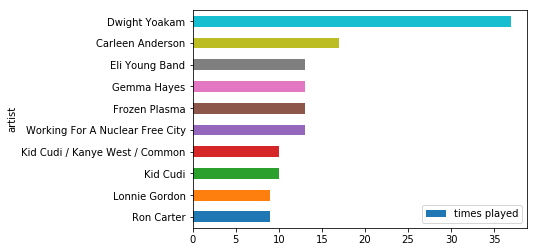

In [62]:
query = """
SELECT
    COUNT(sp.songplay_id) as "times played",
    ar.name as "artist"
FROM songplay sp
JOIN songs sg ON (sp.song_id = sg.song_id)
JOIN time t ON (sp.start_time = t.start_time)
JOIN artists ar ON (sp.artist_id = ar.artist_id)
WHERE t.year = 2018
GROUP BY ar.name
ORDER BY COUNT(sp.songplay_id) DESC
LIMIT 10
"""

df = sqlio.read_sql_query(query, connection)
df.sort_values("times played").plot(x="artist", y="times played", kind="barh")

In [64]:
connection.close()